In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow import keras
from sklearn.metrics import f1_score
import csv
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/HW4_data.zip'

In [4]:
X_train = []
for i in range(10000):
    X_train.append(np.asarray(Image.open("HW4_data/public/train_{i}.jpg".format(i=i))))
df_train = pd.read_csv("HW4_data/public/train_label.csv", index_col=0)

In [5]:
X_val = []
for i in range(1000):
    X_val.append(np.asarray(Image.open("HW4_data/public/val_{i}.jpg".format(i=i))))
    
df_val = pd.read_csv("HW4_data/public/val_label.csv", index_col=0)

In [6]:
X_test = []
for i in range(1500):
    X_test.append(np.asarray(Image.open("HW4_data/private/test_{i}.jpg".format(i=i))))

df_test_demo = pd.read_csv("HW4_data/private/test_demo.csv", index_col=0)

In [9]:
model_advance = keras.Sequential()
model_advance.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,1)))
model_advance.add(MaxPooling2D(pool_size=(2,2)))
model_advance.add(Conv2D(64,(3,3),activation='relu'))
model_advance.add(MaxPooling2D(pool_size=(2,2)))
#model_advance.add(Conv2D(128,(3,3),activation='relu'))
#model_advance.add(MaxPooling2D(pool_size=(2,2)))
model_advance.add(Flatten())
model_advance.add(Dense(512,activation='relu'))
model_advance.add(Dropout(0.25))
model_advance.add(Dense(7, activation='sigmoid'))
#model.compile(loss = 'sparse_categorical_crossentropy',
#  optimizer='adam',metrics=['accuracy'])
model_advance.compile(loss = 'binary_crossentropy',
  optimizer='adam',metrics=['accuracy'])

In [10]:
X_train_data = np.array(X_train)
X_train_data = X_train_data[..., np.newaxis]
df_multi = pd.DataFrame(df_train, columns = ['Atelectasis', 'Cardiomegaly', 'Edema', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Support Devices'])
Y_train_data = df_multi.to_numpy()
#Y_train_data = Y_train_data[..., np.newaxis]
history = model_advance.fit(X_train_data, Y_train_data, epochs=5, batch_size=64)

Epoch 1/5
157/157 [==============================] - 246s 2s/step - loss: 7.4291 - accuracy: 0.6370
Epoch 2/5
157/157 [==============================] - 249s 2s/step - loss: 0.3526 - accuracy: 0.6817
Epoch 3/5
157/157 [==============================] - 244s 2s/step - loss: 0.3192 - accuracy: 0.6982
Epoch 4/5
157/157 [==============================] - 240s 2s/step - loss: 0.2958 - accuracy: 0.7070
Epoch 5/5
157/157 [==============================] - 240s 2s/step - loss: 0.2562 - accuracy: 0.7259


In [11]:
X_val_data = np.array(X_val)
X_val_data = X_val_data[..., np.newaxis]

df_multi_val = pd.DataFrame(df_val, columns = ['Atelectasis', 'Cardiomegaly', 'Edema', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Support Devices'])
Y_val_data = df_multi_val.to_numpy()

y_hat_val = model_advance.predict(X_val_data)
y_hat_val = np.round(y_hat_val).astype(int)
#print(y_hat_val)
#print(Y_val_data)
#print(y_hat)
f1_score(Y_val_data, y_hat_val, average='weighted')

0.5987808672623405

In [17]:
X_test_data = np.array(X_test)
X_test_data = X_test_data[..., np.newaxis]

y_predict_advanced = model_advance.predict(X_test_data)
y_predict_advanced = np.round(y_predict_advanced).astype(int)

#y_predict_basic = y_predict_basic.flatten()

dict_keys(['loss', 'accuracy'])


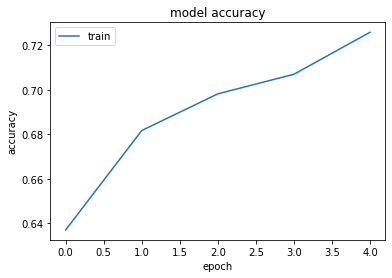

In [13]:
plt.plot(history.history['accuracy'])
print(history.history.keys())
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

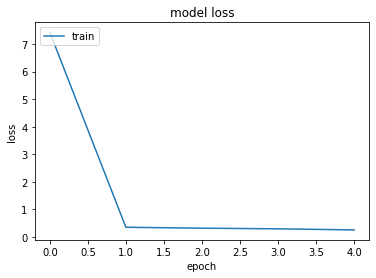

In [14]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
print(y_predict_advanced)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


In [19]:
output_dataroot = '108062373' + '_advanced_prediction.csv'

L = []
for i in range(len(y_predict_advanced)):
  L.append([i])
  for j in y_predict_advanced[i]:
    L[i].append(j)


with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['', 'Atelectasis', 'Cardiomegaly', 'Edema', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Support Devices'])
    for l in L:
      writer.writerow(l)